In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('50_Startups_LR.csv')

In [50]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Basic Checks

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [8]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Insights  
1. There are no missing values in data.
2. Avg max amount is spend on R & D rather than on marketing .
3. There are some cases where investment on R&D spend and Marketing spend is 0 which is affecting profit.
4. Max profit is 192262.

## Domain Analysis  
R&D Spend: Reflects investment in innovation; directly impacts product development and competitiveness.  
Administration: Captures operational expenses, impacting efficiency and resource management.  
Marketing Spend: Indicates promotional efforts; strongly correlates with revenue generation.  
State: Represents geographical data, which can influence market trends and operational costs.  
Profit: Target variable measuring overall business performance.

In [30]:
data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


### EDA

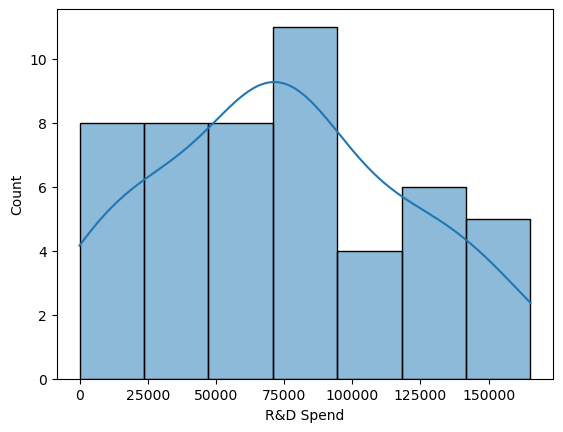

In [32]:
# Univariate Analysis.
# For R&D column.
sns.histplot(x='R&D Spend',data=data,kde=True)
plt.show()

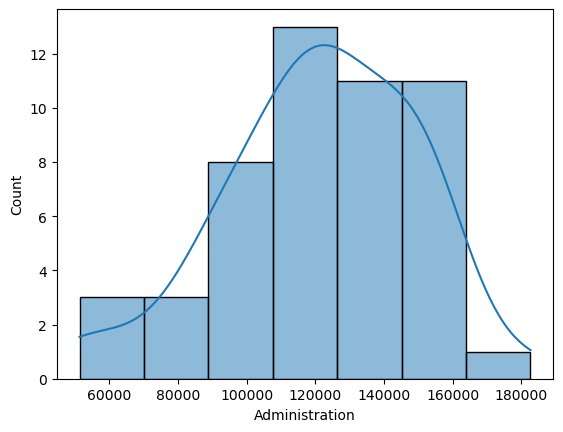

In [33]:
# Analyzing Administration
sns.histplot(x=data.Administration,kde=True)
plt.show()

We can say that the data is kinda normally distributed.

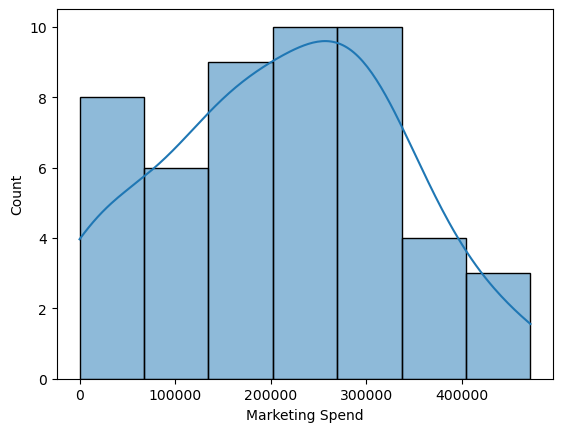

In [34]:
# Analyzing Marketing spend
sns.histplot(x='Marketing Spend',data=data,kde=True)
plt.show()

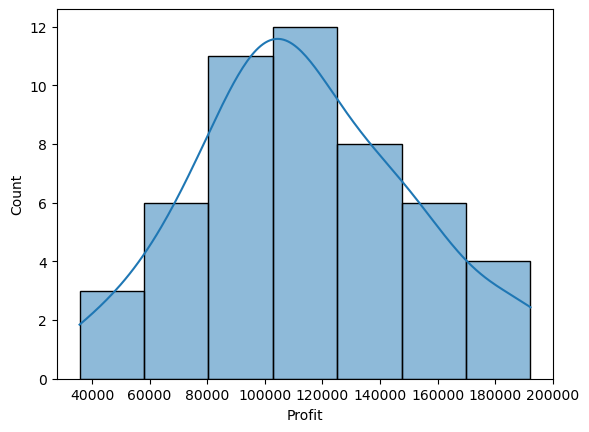

In [36]:
# Analyzing Profit column
sns.histplot(x=data.Profit,kde=True)
plt.show()                               # Insight - Kinda normally distributed.

### Bivariate Analysis.

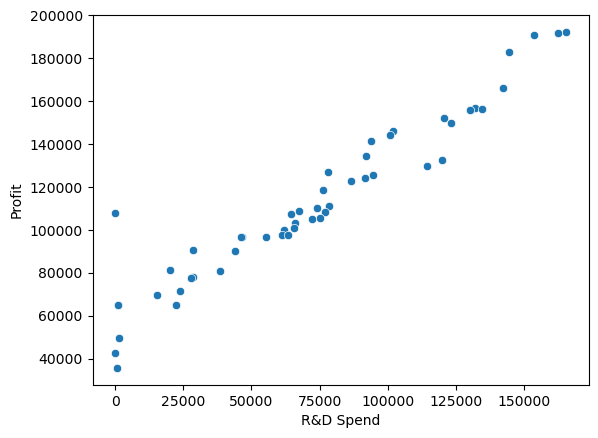

In [37]:
# Analyzing R&D with Profit
sns.scatterplot(x='R&D Spend',y='Profit',data=data)
plt.show()

#### Insights:
- We can see in above data, that there is a poistive relationship.
- Means, as we increase the investment in R&D, Profit is also increasing. 

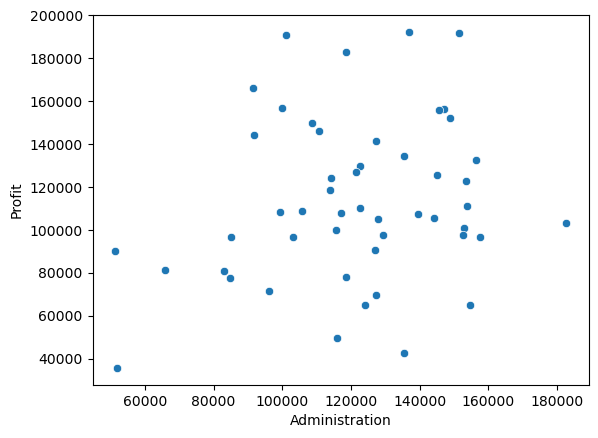

In [38]:
# Analyzing relationship between Adminstration
sns.scatterplot(x='Administration',y='Profit',data=data)
plt.show()

#### Inisghts:
- We can see that data is more scatter to everywhere on the graph
- so there is no specific relationship between Adminstration and Profit.
- Means how much amount we spend does not affect Profit.

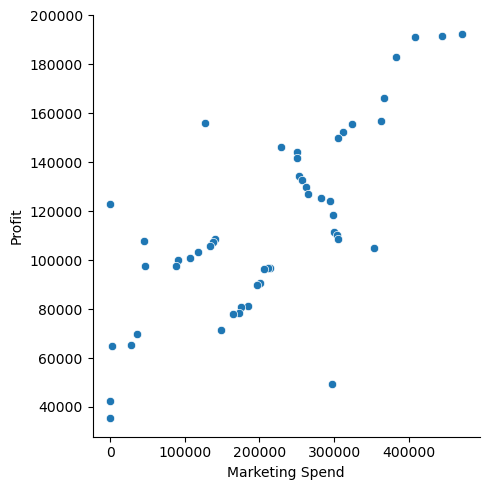

In [40]:
# Analyzing Marketing trend with Profit
sns.relplot(x='Marketing Spend',y='Profit',data=data)
plt.show()

#### Insights:
- If we increase Marketing spend, Profit will also increase.
- There is positive replationship between both columns.

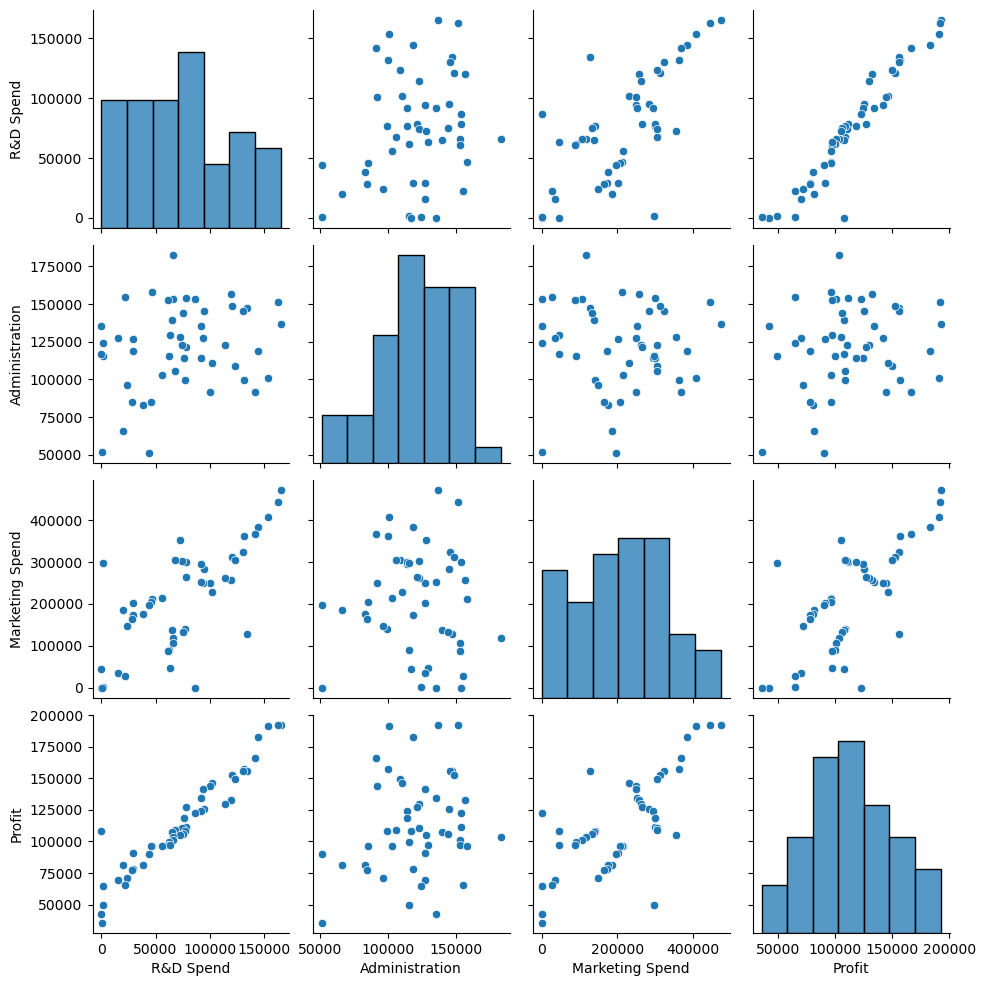

In [42]:
# Multivariatie Analysis.
sns.pairplot(data=data)
plt.show()

### Data Preprocessing

In [11]:
#Checking missing values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Data does not have any missing values.

In [13]:
# Checking duplicated values
data.duplicated().sum()

0

In [14]:
data.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


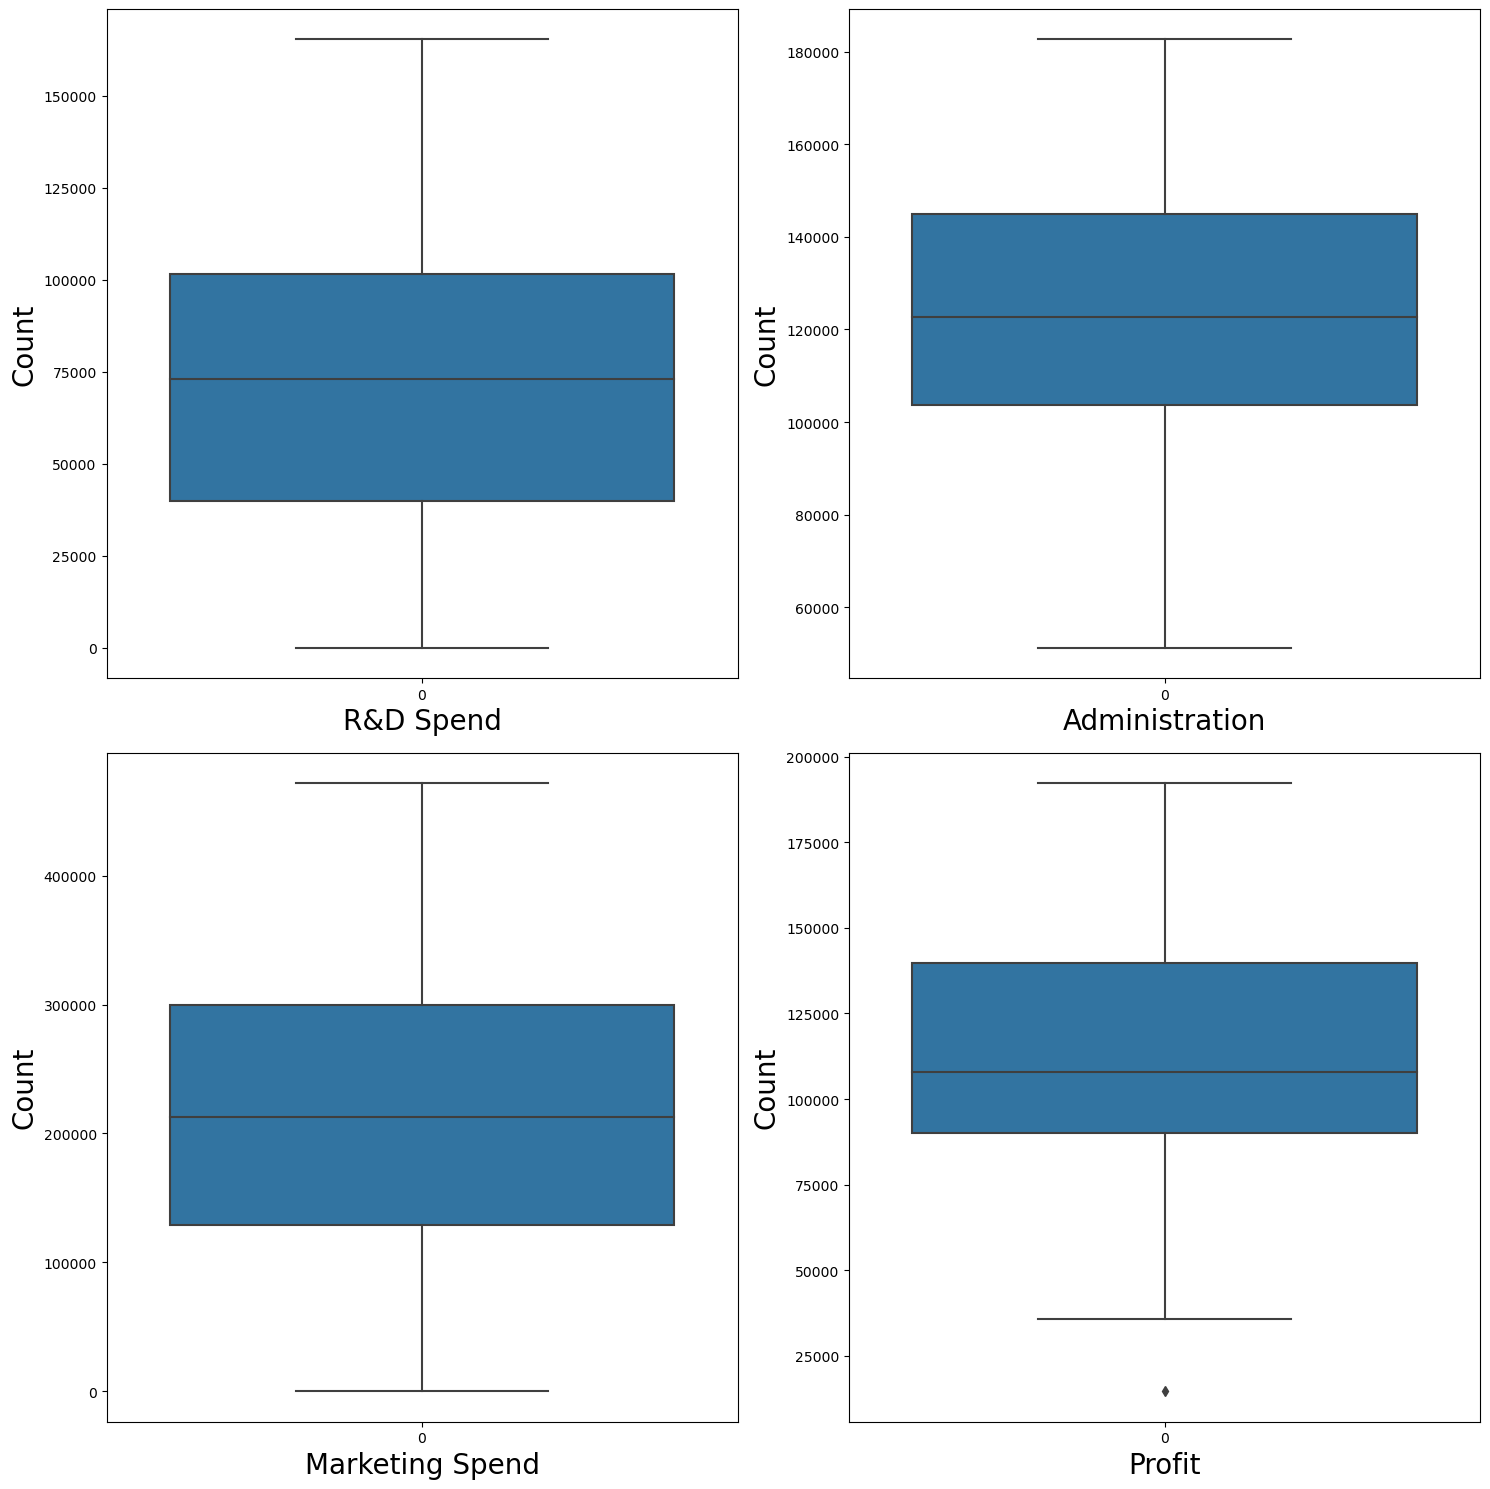

In [20]:
# Checking Outliers
plt.figure(figsize=(15,15),facecolor='white')
plotnumber = 1
for column in data.drop('State',axis=1):
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### As we can see in above graphs there is no outlier in any independant features. But there is one outlier in output column i.e. Profit.

In [21]:
# Handling those outliers
q1 = data['Profit'].quantile(0.25)
q3 = data['Profit'].quantile(0.75)
print(q1)
print(q3)

90138.9025
139765.97749999998


In [22]:
iqr = q3-q1
print('IQR=',iqr)

IQR= 49627.07499999998


In [24]:
min_ = q1-1.5*iqr
max_ = q3+1.5*iqr
print(min_)
print(max_)

15698.290000000023
214206.58999999997


In [25]:
data.loc[data['Profit']<min_]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [26]:
data['Profit'].median()

107978.19

In [27]:
data.loc[data['Profit']<min_,'Profit']=data['Profit'].median()

In [28]:
data.loc[data['Profit']<min_]

,R&D Spend,Administration,Marketing Spend,State,Profit


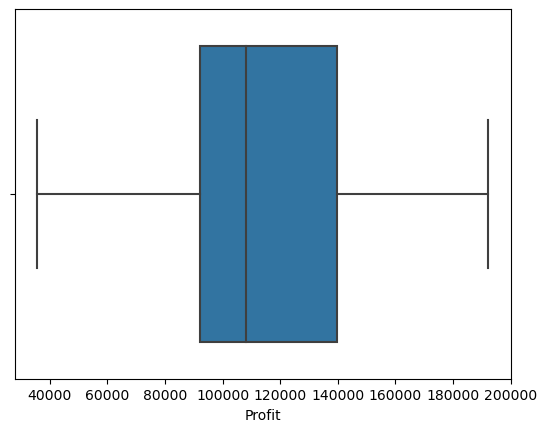

In [29]:
sns.boxplot(x='Profit',data=data)
plt.show()

#### So we've succesfully handled the outlier in Profit column

### Feature Selection 

In [44]:
# selecting features for x and y variable.
x = data[['R&D Spend','Administration','Marketing Spend']]
y = data['Profit']

In [45]:
# Splitting data into training and testing split.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=48)

In [56]:
x_train.head()

,R&D Spend,Administration,Marketing Spend
11,100671.96,91790.61,249744.55
42,23640.93,96189.63,148001.11
23,67532.53,105751.03,304768.73
26,75328.87,144135.98,134050.07
12,93863.75,127320.38,249839.44


In [59]:
len(x_test)

50

In [58]:
y_train.head()

11    144259.40
42     71498.49
23    108733.99
26    105733.54
12    141585.52
Name: Profit, dtype: float64

### Model Building 

In [60]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [61]:
LR

LinearRegression()

In [63]:
y_predict = LR.predict(x_test)

In [65]:
y_predict

array([150391.40779787, 169518.31662047,  55817.53558143, 184149.96922024,
        55015.92332806, 157855.64996868, 152404.33106081, 148810.98487502,
       117478.76897499, 118829.30645612])

In [67]:
y_test.head()

8     152211.77
3     182901.99
45     64926.08
1     191792.06
47     42559.73
Name: Profit, dtype: float64

In [69]:
# M(slope) value in y=mx+c
LR.coef_

array([ 0.73885521, -0.00211546,  0.02034616])

In [70]:
# C value in y=mx+c
LR.intercept_

55302.41351958333

### Checking predictions for random data


In [71]:
LR.predict([[14000,233890,28000]])

array([65721.29411928])

## Model Evaluation

In [72]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [73]:
# MSE 
mse = mean_squared_error(y_test,y_predict)
mse

76965967.72026494

In [77]:
# RMSE
rmse = np.sqrt(mse)
rmse

8773.025003968982

In [75]:
mae = mean_absolute_error(y_test,y_predict)
mae

7030.943458144958

In [76]:
r2 = r2_score(y_test,y_predict)
r2

0.9619304105167344

In [82]:
# Absolute r2_score
abs_r2 = 1-(1-r2)*(len(x_test)-1)/(len(x_test)-len(x_test.columns)-1)
abs_r2

0.9428956157751016

### So we can conclude that our model is well trained and after testing it is performing almost 94 to 96% correct.